## Homework 6
Hi everyone this is your sixth homework.

In this exercise, You will deal with **Unsupervised Learning**.

You are free to discuss the problems and ways to approach them with your classmates, but be sure to not cheat. **Cheating will not be tolerated**.

## <font color="red">**Question 1**</font>
In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

- Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [2]:
import numpy as np
np.random.seed(0)

**Import libraries**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

The code generates simulated data for three classes (class1, class2, and class3) using numpy functions. Each class has 20 observations and 50 variables. 

The values are drawn from normal distributions with different means (0, 0.5, and -0.5), and a small standard deviation (0.01). 

The `np.full` function is used to add a column representing the class label (1, 2, or 3).

In [4]:
# Generate separable data for each class
class1 = np.append(np.random.normal(0, 0.01, (20, 50)), np.full((20, 1), 1), axis=1)
class2 = np.append(np.random.normal(0.5, 0.01, (20, 50)), np.full((20, 1), 2), axis=1)
class3 = np.append(np.random.normal(-0.5, 0.01, (20, 50)), np.full((20, 1), 3), axis=1)

The code stacks the data from all three classes vertically using `np.vstack` to create a single dataset (simulated_data).

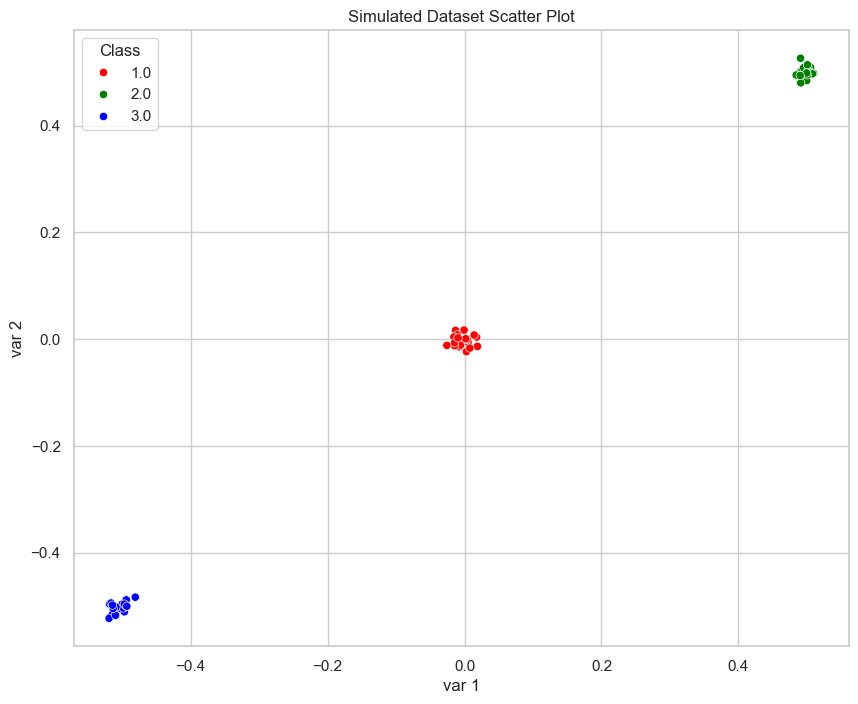

In [5]:
# Combine the data from all classes
simulated_data = np.vstack((class1, class2, class3))

# Create a DataFrame for seaborn
df = pd.DataFrame(simulated_data, columns=[f'var {i+1}' for i in range(50)] + ['Class'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Scatter plot with seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='var 1', y='var 2', hue='Class', palette=['red', 'green', 'blue'], data=df)
plt.title('Simulated Dataset Scatter Plot')
plt.show()

In [6]:
df

,var 1,var 2,var 3,var 4,var 5,var 6,var 7,var 8,var 9,var 10,...,var 42,var 43,var 44,var 45,var 46,var 47,var 48,var 49,var 50,Class
0,0.017641,0.004002,0.009787,0.022409,0.018676,-0.009773,0.009501,-0.001514,-0.001032,0.004106,...,-0.014200,-0.017063,0.019508,-0.005097,-0.004381,-0.012528,0.007775,-0.016139,-0.002127,1.0
1,-0.008955,0.003869,-0.005108,-0.011806,-0.000282,0.004283,0.000665,0.003025,-0.006343,-0.003627,...,0.012224,0.002083,0.009766,0.003564,0.007066,0.000105,0.017859,0.001269,0.004020,1.0
2,0.018832,-0.013478,-0.012705,0.009694,-0.011731,0.019436,-0.004136,-0.007475,0.019229,0.014805,...,0.004394,0.001667,0.006350,0.023831,0.009445,-0.009128,0.011170,-0.013159,-0.004616,1.0
3,-0.000682,0.017133,-0.007448,-0.008264,-0.000985,-0.006635,0.011266,-0.010799,-0.011475,-0.004378,...,0.002671,-0.000393,-0.011681,0.005233,-0.001715,0.007718,0.008235,0.021632,0.013365,1.0
4,-0.003692,-0.002394,0.010997,0.006553,0.006401,-0.016170,-0.000243,-0.007380,0.002799,-0.000982,...,-0.003973,-0.001329,-0.002978,-0.003090,-0.016760,0.011523,0.010796,-0.008134,-0.014664,1.0
5,0.005211,-0.005758,0.001420,-0.003193,0.006915,0.006947,-0.007256,-0.013834,-0.015829,0.006104,...,-0.004810,0.023039,-0.010600,-0.001359,0.011369,0.000977,0.005830,-0.003994,0.003701,1.0
6,-0.013065,0.016581,-0.001182,-0.006802,0.006664,-0.004607,-0.013343,-0.013467,0.006938,-0.001596,...,-0.004534,-0.006878,-0.012141,-0.004409,-0.002804,-0.003647,0.001567,0.005785,0.003497,1.0
7,-0.007641,-0.014378,0.013645,-0.006894,-0.006523,-0.005212,-0.018431,-0.004780,-0.004797,0.006204,...,-0.002227,-0.003534,-0.016165,-0.002918,-0.007615,0.008579,0.011411,0.014666,0.008526,1.0
8,-0.005987,-0.011159,0.007667,0.003563,-0.017685,0.003555,0.008145,0.000589,-0.001851,-0.008076,...,-0.011594,-0.000859,0.001943,0.008758,-0.001151,0.004574,-0.009646,-0.007826,-0.001104,1.0
9,-0.010546,0.008202,0.004631,0.002791,0.003389,0.020210,-0.004689,-0.022014,0.001993,-0.000506,...,-0.003499,0.011003,0.012980,0.026962,-0.000739,-0.006586,-0.005142,-0.010180,-0.000779,1.0


- Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

The code performs PCA on a simulated dataset with 60 observations and 50 variables, extracts the first two principal components, creates a DataFrame for visualization, and generates a scatter plot using seaborn to visualize the separation between three classes based on the first two principal components. 

on the plot we can see our data are separable so we can continue to part C.

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

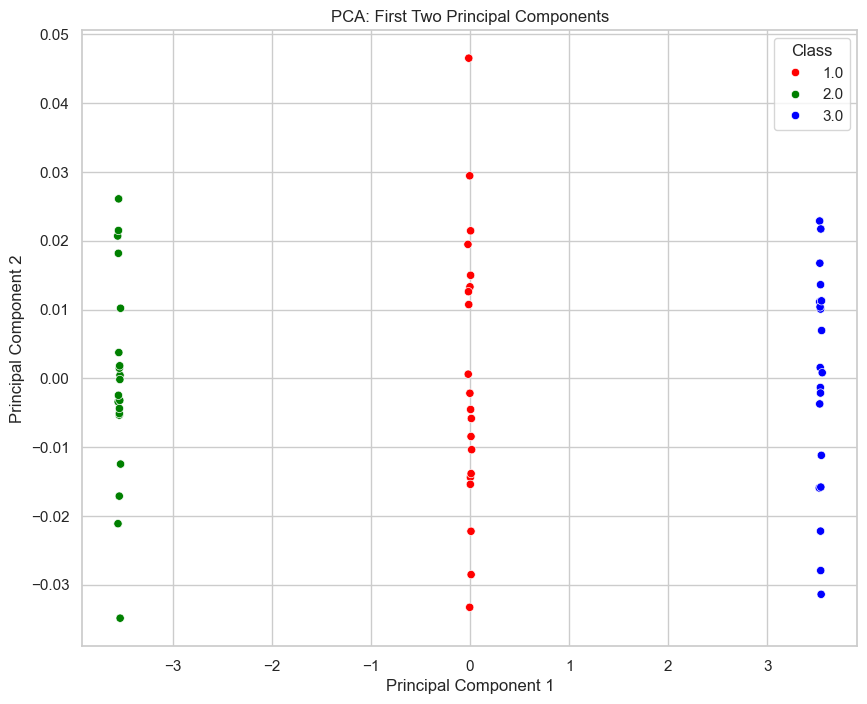

In [8]:
# Extract features (variables) and labels
X = simulated_data[:, 0:50]
y = simulated_data[:, -1]

# Perform PCA
principal_components = pca.fit_transform(X)

# Create a DataFrame for seaborn
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Class'] = y

# Set the style for seaborn
sns.set(style="whitegrid")

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Class', palette=['red', 'green', 'blue'], data=pca_df)
plt.title('PCA: First Two Principal Components')
plt.show()


- Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

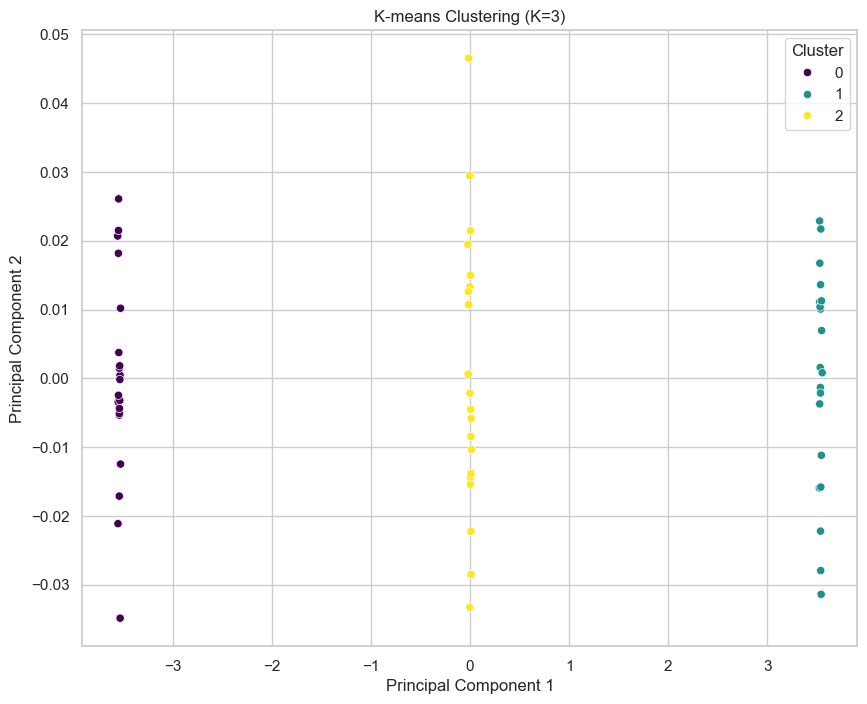

In [9]:
from sklearn.cluster import KMeans

# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit(X).labels_

# Add cluster labels to the DataFrame
pca_df['Cluster'] = cluster_labels

# Set the style for seaborn
sns.set(style="whitegrid")

# Scatter plot of the first two principal components with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('K-means Clustering (K=3)')
plt.show()


in bottom dataframe we can see our `KMeans` perform well sync with the class labels.

In [10]:
pca_df

,Principal Component 1,Principal Component 2,Class,Cluster
0,-0.011891,0.046541,1.0,2
1,-0.000434,-0.002169,1.0,2
2,-0.020119,0.019471,1.0,2
3,0.004610,-0.014392,1.0,2
4,0.006893,-0.004525,1.0,2
5,-0.002417,-0.033285,1.0,2
6,0.012007,-0.028527,1.0,2
7,0.011917,-0.013846,1.0,2
8,0.000177,0.013309,1.0,2
9,-0.002319,0.029444,1.0,2


- Perform K-means clustering with K = 2. Describe your results.

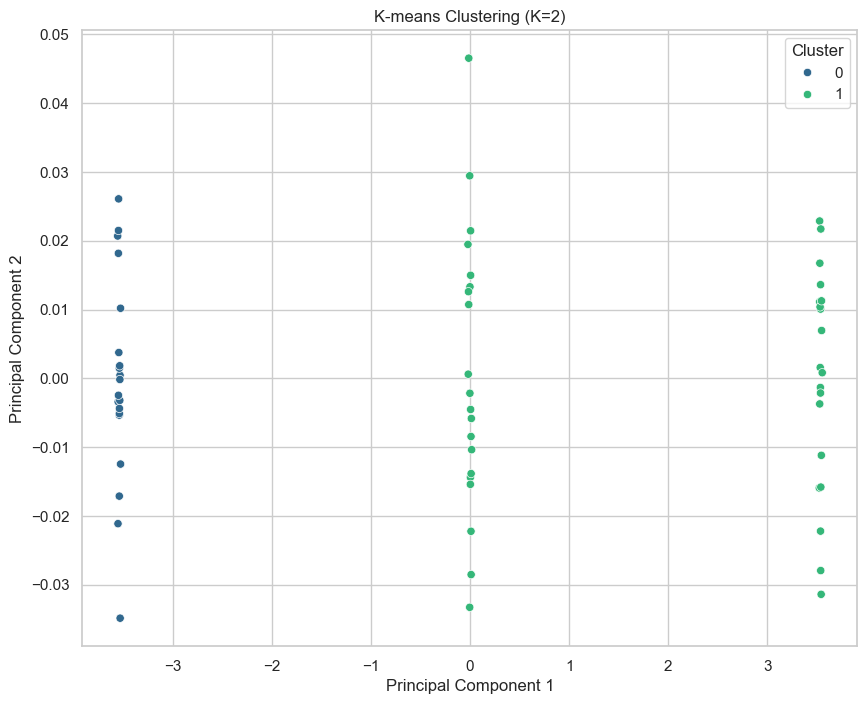

In [11]:
# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit(X).labels_

# Add cluster labels to the DataFrame
pca_df['Cluster'] = cluster_labels

# Set the style for seaborn
sns.set(style="whitegrid")

# Scatter plot of the first two principal components with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('K-means Clustering (K=2)')
plt.show()

The observations corresponding to the first two class labels are successfully clustered accordingly. However, it appears that the observations from the third class label are grouped together with the observations from the `first` class label in the K-means clustering with `K=2`.

In [12]:
pca_df

,Principal Component 1,Principal Component 2,Class,Cluster
0,-0.011891,0.046541,1.0,1
1,-0.000434,-0.002169,1.0,1
2,-0.020119,0.019471,1.0,1
3,0.004610,-0.014392,1.0,1
4,0.006893,-0.004525,1.0,1
5,-0.002417,-0.033285,1.0,1
6,0.012007,-0.028527,1.0,1
7,0.011917,-0.013846,1.0,1
8,0.000177,0.013309,1.0,1
9,-0.002319,0.029444,1.0,1


- Now perform K-means clustering with K = 4, and describe your results.

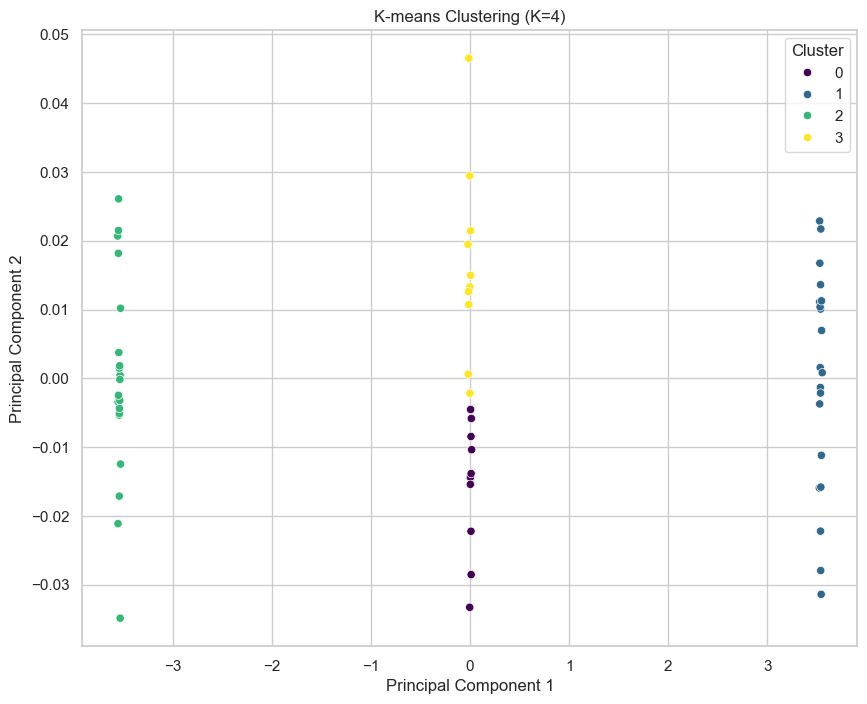

In [13]:
# Perform K-means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit(X).labels_

# Add cluster labels to the DataFrame
pca_df['Cluster'] = cluster_labels

# Set the style for seaborn
sns.set(style="whitegrid")

# Scatter plot of the first two principal components with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('K-means Clustering (K=4)')
plt.show()

With `K=4` in K-means clustering, the last two classes are successfully identified as distinct groups. However, for the first class, the algorithm further divides it into two subgroups, maybe it's indicating internal variability or a finer partitioning within this class.

In [14]:
pca_df

,Principal Component 1,Principal Component 2,Class,Cluster
0,-0.011891,0.046541,1.0,3
1,-0.000434,-0.002169,1.0,3
2,-0.020119,0.019471,1.0,3
3,0.004610,-0.014392,1.0,0
4,0.006893,-0.004525,1.0,0
5,-0.002417,-0.033285,1.0,0
6,0.012007,-0.028527,1.0,0
7,0.011917,-0.013846,1.0,0
8,0.000177,0.013309,1.0,3
9,-0.002319,0.029444,1.0,3


<hr>

## <font color="red">**Question 2**</font>

For a real world example, we will use **Bank Marketing Data Set dataset**. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

**Columns**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)
21. subscribed : has the client subscribed a term deposit? (binary: 'yes','no')


In [15]:
# Load Libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler

**Read dataset & Data Exploraty**

In [16]:
df = pd.read_csv('./bank_marketing_dataset.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We don't have any `null` values , It's good.

In [18]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

Check for `duplicate` values

We have duplicate values , so we will drop it.

In [43]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [44]:
df = df.drop_duplicates()
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed


#### Exploratory Data Analysis - Preprocessing

- let's try to undertand age distribution of customers.

Our customers' ages range from 17 to 98 years. The majority falls between 30 and 40 years old.

In [57]:
print(df['age'].value_counts())
print("*" * 30)
print("Min age:", df['age'].min())
print("Max age:", df['age'].max())

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
******************************
Min age: 17
Max age: 98


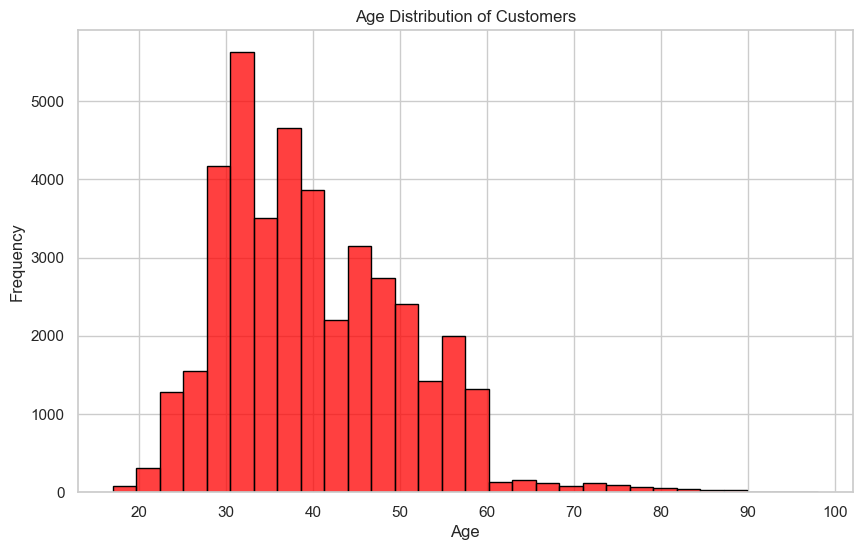

In [51]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=False, color='red', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


-  see if there is between ages and loan status of customers.

In general, most people do not have personal loans. And from our data is as follows: in each age group that we specified, most people do not have personal loans, and then most of the data is related to people who have personal loans, and at the end, unspecified data is placed.

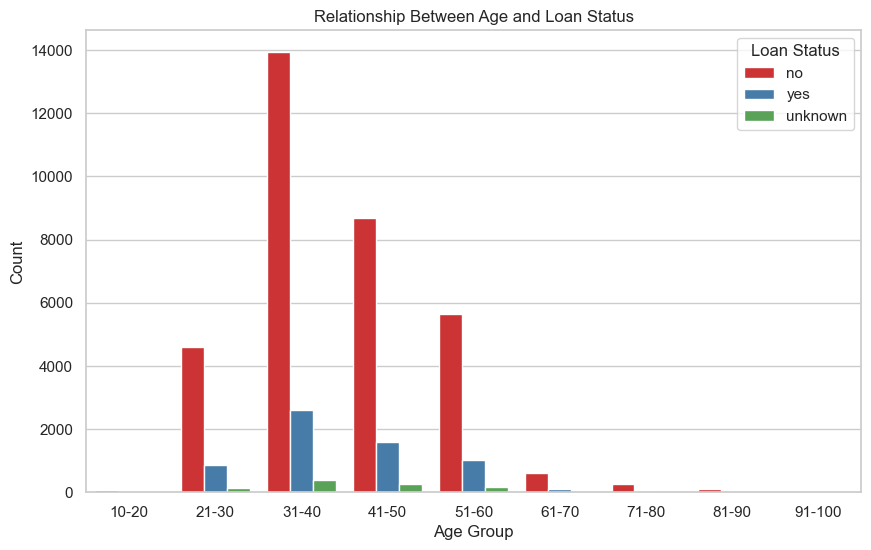

In [69]:
# Categorize age into groups
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Plotting the relationship between age and loan status
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='loan', data=df, palette='Set1')
plt.title('Relationship Between Age and Loan Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()


- try to undertand marital status distribution of customers.

We can see , most of our customers maritla status is `married`

In [76]:
df['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

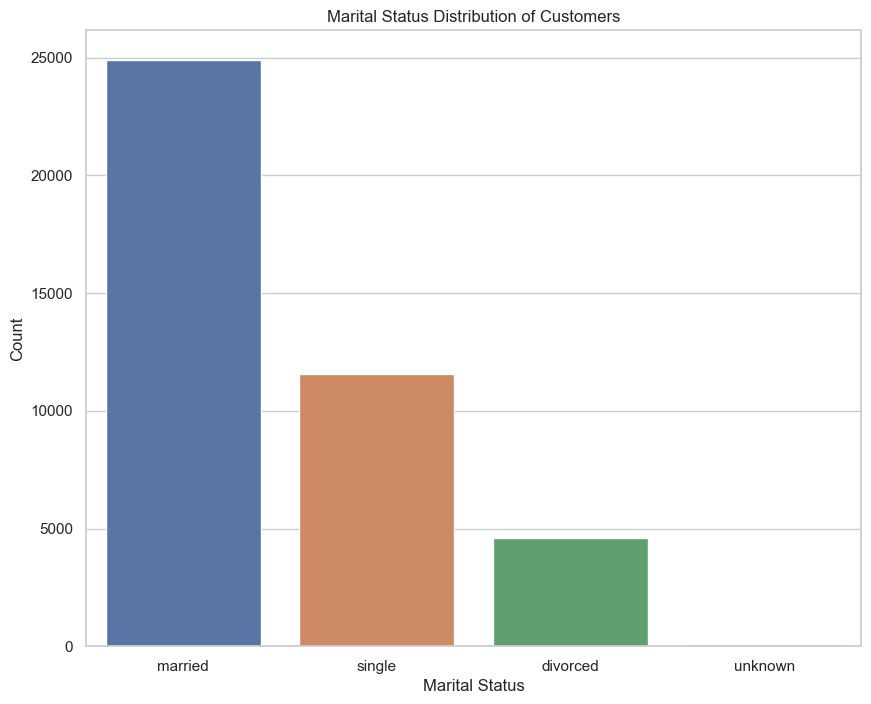

In [75]:
# Plotting the distribution of marital status
plt.figure(figsize=(10, 8))
sns.countplot(x='marital', hue='marital', data=df)
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


- pdays column means number of days that passed by after the client was last contacted from a previous campaign. 999 means client was not previously contacted. look at that.

In [78]:
df['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

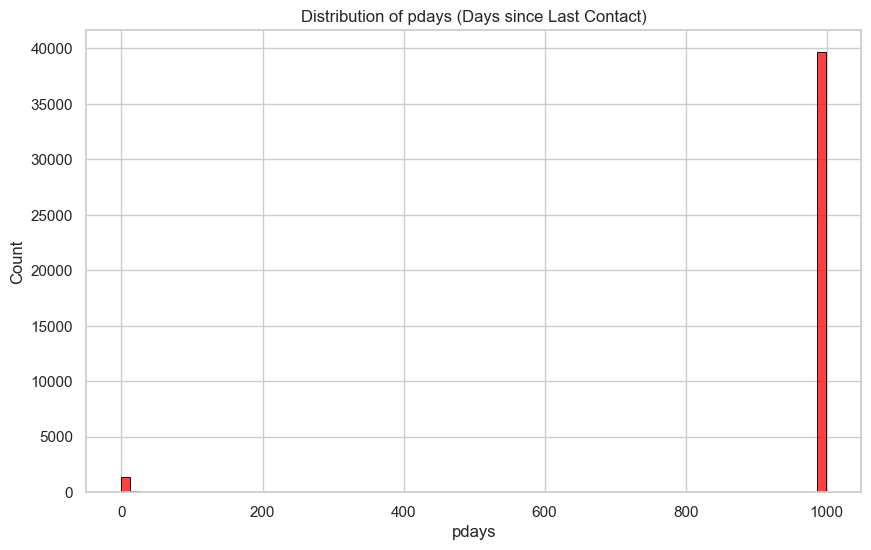

In [83]:
# Plotting the distribution of pdays using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['pdays'], bins=80, kde=False, color='red', edgecolor='black')
plt.title('Distribution of pdays (Days since Last Contact)')
plt.xlabel('pdays')
plt.ylabel('Count')
plt.show()


We have converted 999 to 0 in pdays , because 999 means client was not previously contacted

In [84]:
df.loc[df['pdays'] == 999, 'pdays'] = 0
df['pdays'].value_counts()

0     39676
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

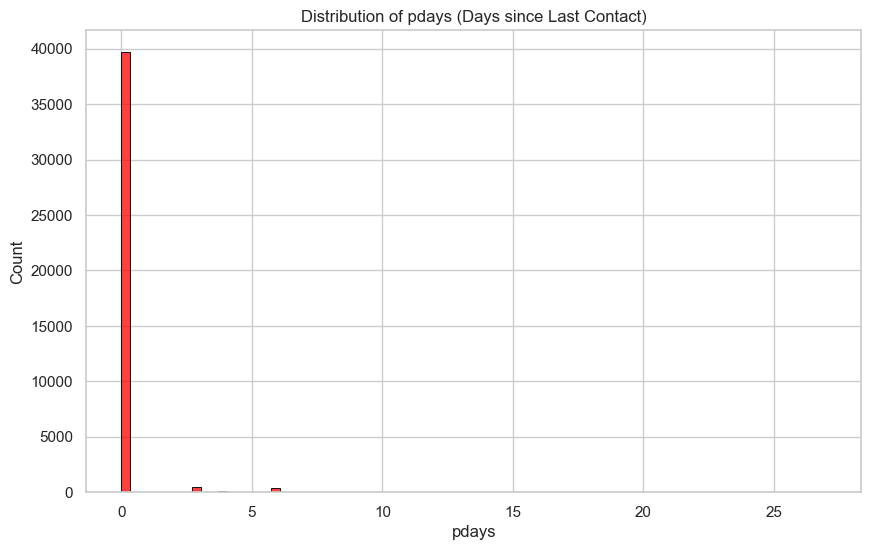

In [85]:
# Plotting the distribution of pdays using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['pdays'], bins=80, kde=False, color='red', edgecolor='black')
plt.title('Distribution of pdays (Days since Last Contact)')
plt.xlabel('pdays')
plt.ylabel('Count')
plt.show()

- look distribution of durations based on contact type

I use `violin plot` for this part .

A violin plot is a statistical visualization that combines aspects of a box plot and a kernel density plot. It is particularly useful for visualizing the distribution of a continuous variable across different categories or groups.

In [86]:
df['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [87]:
df['duration'].value_counts()

90      170
85      170
136     168
73      167
124     163
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

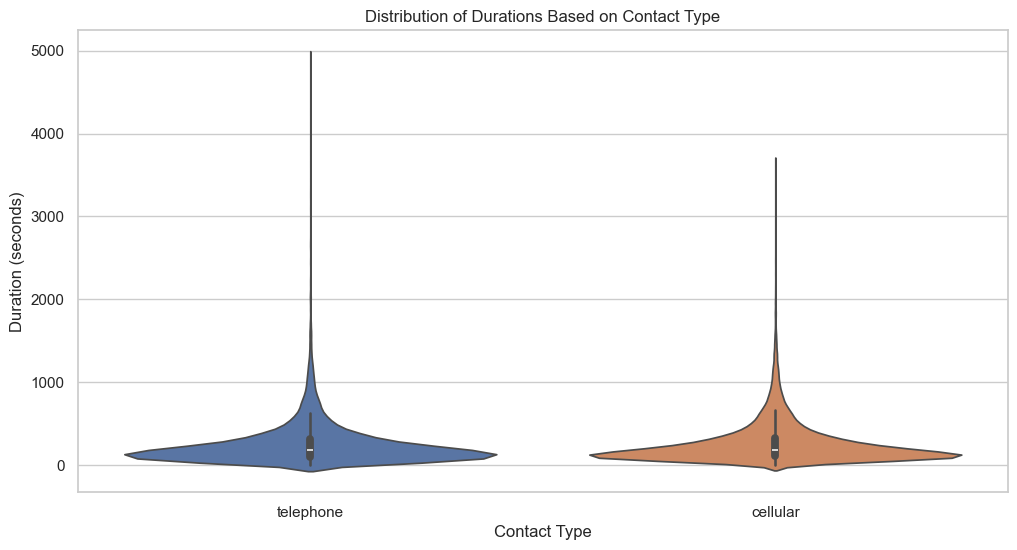

In [91]:
# Plotting the distribution of durations based on contact type using a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='contact', y='duration', hue='contact', data=df, legend=False)
plt.title('Distribution of Durations Based on Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Duration (seconds)')
plt.show()

The above plot shows that the most durations of calls are beetwen 0-1000.

- look loan status of customers.

The bottom plot and results show that most of the customers don't have loan request.

In [94]:
df['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

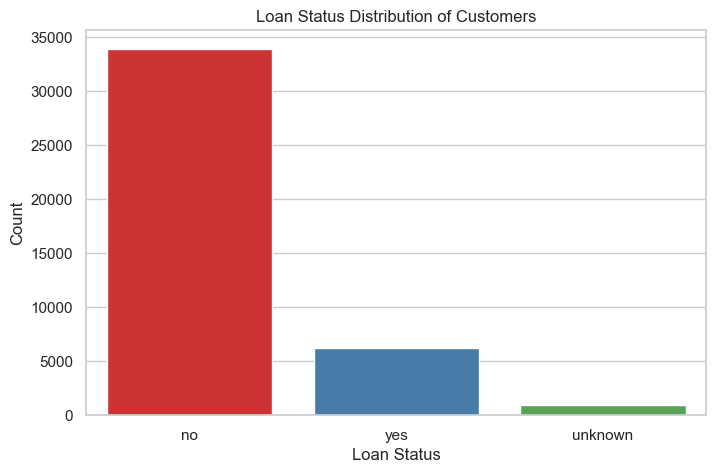

In [93]:
# Plotting the distribution of loan status using a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x='loan', hue='loan', data=df, palette='Set1', dodge=False, legend=False)
plt.title('Loan Status Distribution of Customers')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

- look jobs, education customers

In [96]:
df['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [97]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

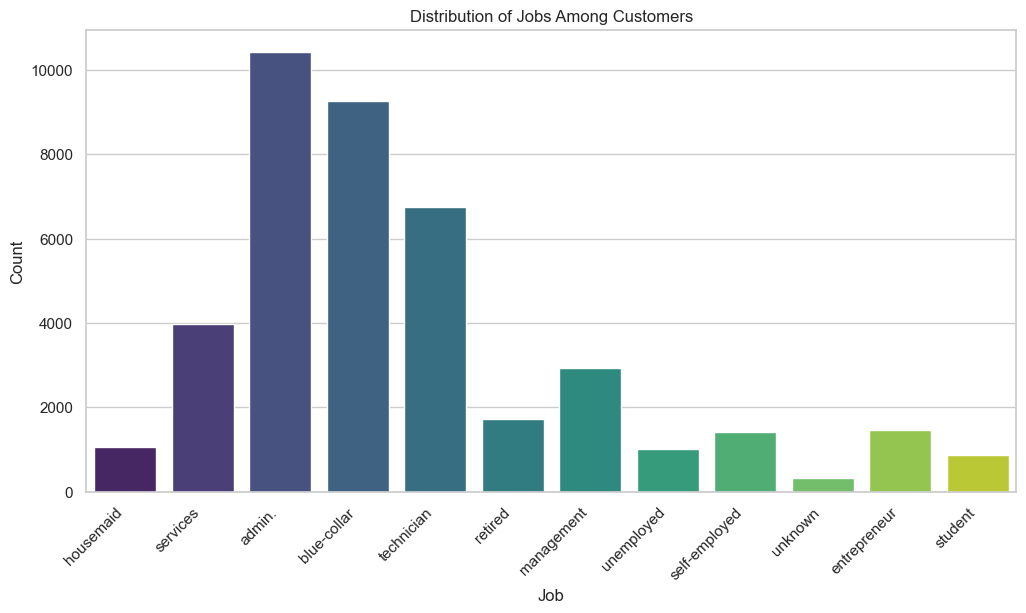

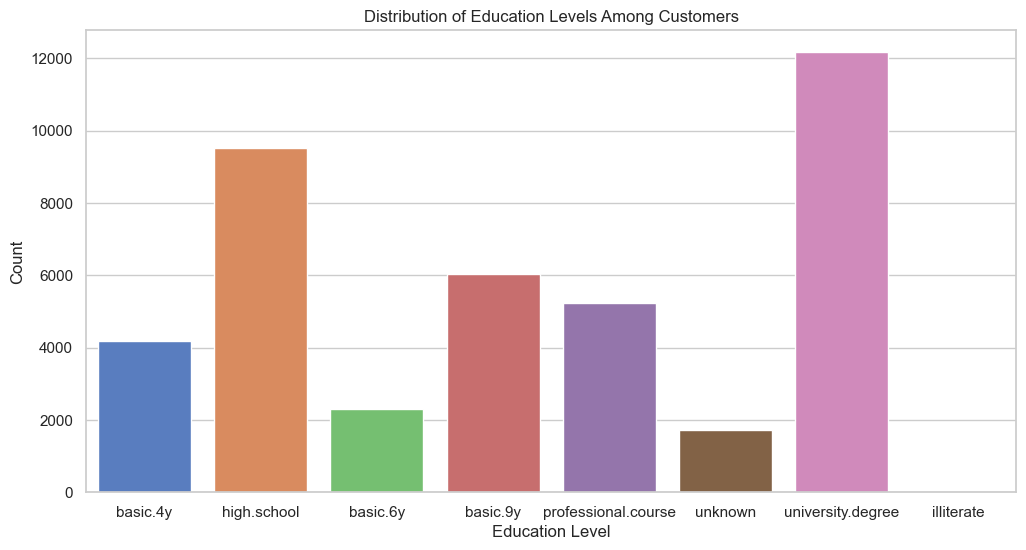

In [100]:
# Plotting the distribution of jobs using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='job', data=df, palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Jobs Among Customers')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plotting the distribution of education using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='education', data=df, palette='muted', dodge=False, legend=False)
plt.title('Distribution of Education Levels Among Customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

- In order to calculate distances for K-Means clustering, all features must be in numeric format. solve this issue and then apply scaling

First we convert all `unknown` values with `Nan`.

Then Fill null values with previous techniques.

In [106]:
df.replace('unknown', np.NAN, inplace=True)

In [107]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
subscribed           0
age_group            0
dtype: int64

`job` column :

Replace null values with the most frequently occurring job category in this column.

In [108]:
df['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [109]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['job'].isnull().sum()

0

`marital` column :

Replace null values with the most frequently occurring job category in this column.

In [112]:
df['marital'].value_counts()

married     25001
single      11564
divorced     4611
Name: marital, dtype: int64

In [111]:
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['marital'].isnull().sum()

0

`education` column :

Replace null values with the most frequently occurring job category in this column.

In [113]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

Use kmeans and fit the model

In [27]:
# Your code:

- correlations of each feature with clusters that you assigned.

In [28]:
# Your code:

- How to find optimal number of clusters (K)?

<font color="green">**Answer:**</font>

In [29]:
# Your code:

## DBSCAN (Density-based spatial clustering)

**DBSCAN**, which stands for Density-Based Spatial Clustering of Applications with Noise, is a clustering algorithm used in machine learning and data mining. Unlike k-means, DBSCAN does not require the user to specify the number of clusters beforehand and can identify clusters of arbitrary shapes. It is particularly effective in discovering clusters in data with varying densities.

Here are the main concepts associated with DBSCAN:

**Core Points:**
A data point is considered a core point if there are at least a specified number of data points (minPts) within a certain radius (eps) around it, including itself.

**Border Points:** A data point is a border point if it is within the specified radius of a core point but does not have enough neighbors to be considered a core point itself.

**Noise:** Data points that are neither core points nor border points are considered noise. They do not belong to any cluster.

The DBSCAN algorithm works as follows:

1. **Select a Random Unvisited Data Point:**
Choose a data point that has not been visited.
2. **Expand Cluster:**
If the chosen point is a core point, create a new cluster and expand it by adding all reachable core points (and their neighbors) to the cluster.
3. **Repeat:**
Continue the process until all points have been visited.
The result is a set of clusters, each containing core points that are densely connected. Border points may be part of a cluster but are not as tightly connected as core points. Noise points are not assigned to any cluster.

The DBSCAN algorithm uses two parameters:

**eps (ε):** A distance measure that will be used to locate the points in the neighborhood of any point. For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.

**minPts:** The minimum number of points (a threshold) clustered together for a region to be considered dense. If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions. All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.

Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

To check out more, please visit [this](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) online visualisation tool.

##<font color="red">**Question 3**</font>
For a real world example, we will use **Wholesale customers dataset**. The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. It can be downloaded from [here](https://archive.ics.uci.edu/dataset/292/wholesale+customers).


Attribute Information:

1. **FRESH:** annual spending (m.u.) on fresh products (Continuous);
2. **MILK:** annual spending (m.u.) on milk products (Continuous);
3. **GROCERY:** annual spending (m.u.)on grocery products (Continuous);
4. **FROZEN:** annual spending (m.u.)on frozen products (Continuous)
5. **DETERGENTS_PAPER:** annual spending (m.u.) on detergents and paper products (Continuous)
6. **DELICATESSEN:** annual spending (m.u.)on and delicatessen products (Continuous);
7. **CHANNEL:** customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8. **REGION:** customers  Region Lisnon, Oporto or Other (Nominal)


- Do exploratory data analysis and preprocessing

- Showing the relation between *MILK* and *GROCERY* spending

- create an annotated clustermap of the correlations between spending on different categories

In [30]:
# Your code:

- Create a variety of models testing different epsilon values.

In [31]:
# Your code:

- Based on the plot that you had from the last part, retrain a DBSCAN model with a reasonable epsilon value

In [32]:
# Your code:

## Image segmentation


Image segmentation is a computer vision task that involves dividing an image into meaningful and semantically coherent regions or segments. The goal is to partition an image into regions that share similar visual characteristics, such as color, texture, intensity, or other features. Each segment typically represents a distinct object or region of interest within the image.

## <font color="red">**Question 4**</font>
In this question, you are supposed to segmente an image using KMeans clustering.


In [33]:
#Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
#load_sample_image dataset from scikit learn consists of numpy array of a single sample image

#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

- Load a sample flower image from load_sample_image scikit learn dataset and show the image


In [34]:
flower = load_sample_image("flower.jpg")
# Your code:

- Get shape, scale, reshape

In [35]:
# Your code:

- Use KMeans clustering and get the different colored images


In [36]:
# Your code:

## Gaussian Mixture Model

**Gaussian Mixture Model** (GMM) is a probabilistic model that represents a mixture of multiple Gaussian (normal) distributions. Each component Gaussian distribution in the mixture represents a cluster or a subpopulation within the overall dataset. GMMs are commonly used for modeling complex probability distributions and are frequently applied in the field of machine learning, particularly in unsupervised learning tasks such as clustering and density estimation.

## <font color="red">**Question 5**</font>
To deal with GMM, we will use **CC GENERAL** dataset.

Following is the Data Dictionary for Credit Card dataset :

- **CUST_ID** : Identification of Credit Card holder (Categorical)
- **BALANCE** : Balance amount left in their account to make purchases
- **BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES** : Amount of purchases made from account
- **ONEOFF_PURCHASES** : Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES** : Amount of purchase done in installment
- **CASH_ADVANCE** : Cash in advance given by the user
- **PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid
- **CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX** : Numbe of purchase transactions made
- **CREDIT_LIMIT** : Limit of Credit Card for user
- **PAYMENTS** : Amount of Payment done by user
- **MINIMUM_PAYMENTS** : Minimum amount of payments made by user
- **PRCFULLPAYMENT** : Percent of full payment paid by user
- **TENURE** : Tenure of credit card service for user


In [37]:
# libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

- Load dataset

In [38]:
# Your code:

- Standardize data, Normalize and Reduce the dimensions of the data

In [39]:
# Your code:

- Use Gaussian Mixture Model

In [40]:
# Your code:

- Visualize the clustering and analyse

In [41]:
# Your code: